In [630]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1

In [631]:
def fftshift(arr, shift):
    shift = int(shift)
    N = len(arr)
    kvec = np.arange(N)
    dft = np.fft.fft(arr)
    shifted_dft = dft * np.exp(-2 * np.pi * 1j * kvec * shift / N)
    return np.real(np.fft.ifft(shifted_dft))

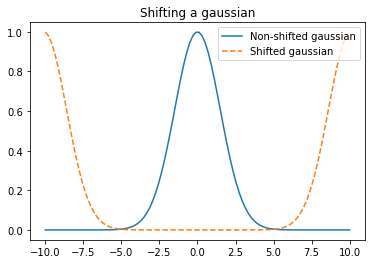

In [645]:
def gauss(x, sigma=1, A=1): 
    return A * np.exp(-0.5 * x**2 / sigma**2)

x = np.linspace(-10, 10, 100)
y = gauss(x, 1.5)

plt.plot(x, y, label='Non-shifted gaussian')
plt.plot(x, arr_shift(y, len(y)//2), ls='--', label='Shifted gaussian')
plt.title("Shifting a gaussian")
plt.legend()
plt.savefig('gauss_shift.png')

# Part 2

In [633]:
def corr(arr1, arr2):
    dft1 = np.fft.fft(arr1)
    dft2 = np.fft.fft(arr2)
    return np.real(np.fft.ifft(dft1 * np.conj(dft2)))

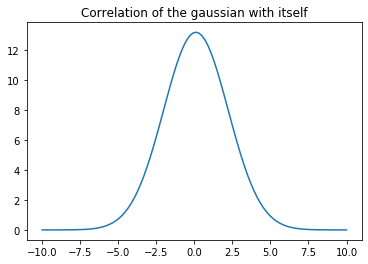

In [634]:
x = np.linspace(-10, 10, 100)
y = gauss(x, 1.5)

plt.plot(x, fftshift(corr(y, y), len(y)//2))
plt.title('Correlation of the gaussian with itself')
plt.savefig('gauss_corr.png')

# Part 3

Correlation function depends on the shift linearly, but in opposite direction. If the shift is positive - the peak of the correlation function moves in the negative direction and viceversa.

In [635]:
def gauss_corr(shift, x, sigma=1, A=1):
    gauss1 = gauss(x, sigma, A)
    gauss2 = fftshift(gauss1, shift)
    return corr(gauss1, gauss2)

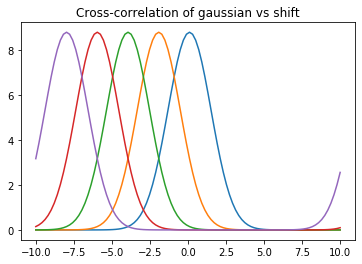

In [636]:
x = np.linspace(-10, 10, 100)

for i in range(0, 50, 10):
    plt.plot(x, fftshift(gauss_corr(i, x), len(x)//2))
    
plt.title('Cross-correlation of gaussian vs shift')
plt.savefig('gauss_corr_shift.png')

# Part 4

The output array of `conv_safe` has length = 2N (because I double it with zeros). 

For comparison I use not-safe `conv` function. On the plot you can see that in case of not-safe `conv` gaussian overlaps itself, while `conv_safe` gives the correct result.

In [637]:
def conv_safe(f, g):
    if len(f) < len(g):
        f, g = g, f
        
    ndif = np.abs(len(g) - len(f))
    if ndif > 0:
        g = np.append(g, np.zeros(ndif))
        
    f = np.append(f, np.zeros(len(f)))
    g = np.append(g, np.zeros(len(g)))
    dft_f = np.fft.fft(f)
    dft_g = np.fft.fft(g)
    return np.real(np.fft.ifft(dft_f * dft_g))

def conv(f, g):
    if len(f) < len(g):
        f, g = g, f
        
    ndif = np.abs(len(g) - len(f))
    if ndif > 0:
        g = np.append(g, np.zeros(ndif))
        
    dft_f = np.fft.fft(f)
    dft_g = np.fft.fft(g)
    return np.real(np.fft.ifft(dft_f * dft_g))

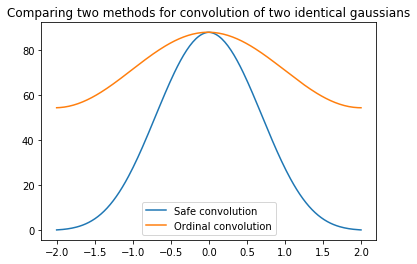

In [638]:
x = np.linspace(-2, 2, 200)
y = gauss(x)
plt.plot(x, conv_safe(y, y)[::2], label='Safe convolution')
plt.plot(x, fftshift(conv(y, y), len(x)//2), label='Ordinal convolution')
plt.legend()
plt.title('Comparing two methods for convolution of two identical gaussians')
plt.savefig("gauss_conv.png")

# Part 5

## 5.a
(ps5_notes.pdf)

## 5.b
(ps5_notes.pdf)

## 5.c
(ps5_notes.pdf)

In [639]:
def sin_dft(k, N):
    kvec = np.fft.fftfreq(N, d=1/N)
    iexp = lambda k: np.exp(-2j * np.pi * k)
    e1 = iexp((kvec - k))
    e2 = iexp((kvec + k))
    e3 = iexp((kvec - k) / N)
    e4 = iexp((kvec + k) / N)
    return ((1 - e1) / (1 - e3) - (1 - e2) / (1 - e4)) / 2j

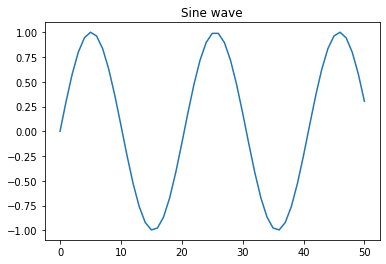

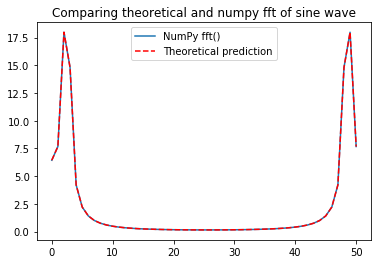

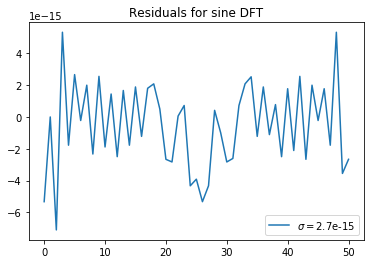

In [647]:
k = 2.5
N = 51
# ============
x = np.linspace(0, 50, N)
y = np.sin(2 * np.pi * k * x / N)

plt.plot(x, y)
plt.title("Sine wave")

plt.figure()
teor = np.abs(sin_dft(k, N))
npft = np.abs(np.fft.fft(y))

plt.plot(npft, label='NumPy fft()')
plt.plot(teor, label='Theoretical prediction', ls='--', c='r')
plt.legend()
plt.title("Comparing theoretical and numpy fft of sine wave")
plt.savefig('sin_dft.png')

plt.figure()
plt.plot(teor-npft, label=fr'$\sigma=${np.std(teor-npft):.1e}')
plt.title('Residuals for sine DFT')
plt.legend()
plt.savefig('sin_dft_resid.png')

## 5.d

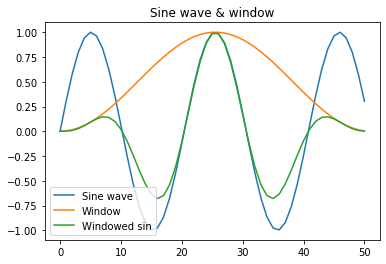

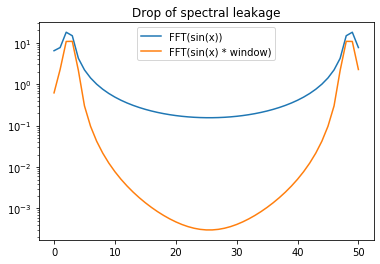

In [641]:
k = 2.5
N = 51
# ============
x = np.linspace(0, 50, N)
y = np.sin(2 * np.pi * k * x / N)

window = 0.5 * (1 - np.cos(2 * x * np.pi / N))

y_windowed = y * window

plt.plot(x, y, label='Sine wave')
plt.plot(x, window, label='Window')
plt.plot(x, y_windowed, label='Windowed sin')
plt.title("Sine wave & window")
plt.legend()
plt.savefig("sin_window.png")

plt.figure()
# teor = np.abs(sin_dft(k, N))
npft = np.abs(np.fft.fft(y))
npft_windowed = np.abs(np.fft.fft(y_windowed))
# plt.plot(teor, label='NumPy fft()')
plt.plot(npft, label='FFT(sin(x))')
plt.plot(npft_windowed, label='FFT(sin(x) * window)')
plt.legend()
plt.yscale('log')
plt.title("Drop of spectral leakage")
plt.savefig('spleak_drop.png')

## 5.d

In [642]:
print("Expected:", N/2, -N/4, 0, 0, 0, '...', 0, 0, 0, -N/4, sep='\t')

fft_window = np.real(np.fft.fft(window))
calcstr = "Calculated:\t"
for i in [0, 1, 2, 3, 4, -4, -3, -2, -1]:
    calcstr += f"{fft_window[i]:.2f}\t"
    if i == 4:
        calcstr += "...\t"
print(calcstr)

Expected:	25.5	-12.75	0	0	0	...	0	0	0	-12.75
Calculated:	25.50	-12.75	0.00	0.00	-0.00	...	0.00	0.00	-0.00	-12.75	


In [643]:
def window_fourier(arr):
    N = len(arr)
    arr = np.append(arr, arr[0])
    return np.array([
        - N / 4 * arr[i-1] + N / 2 * arr[i] - N / 4 * arr[i+1]
    for i in range(N)])

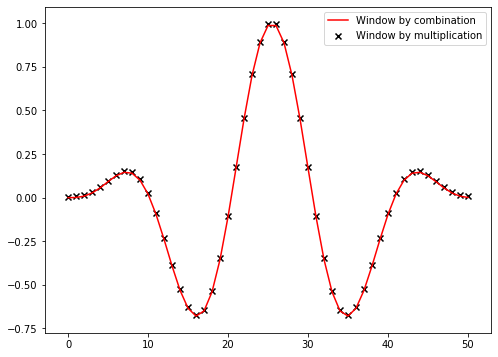

In [644]:
k = 2.5
N = 51
# ============
x = np.linspace(0, 50, N)
y = np.sin(2 * np.pi * k * x / N)

window = 0.5 * (1 - np.cos(2 * x * np.pi / N))

y_wind = y * window

plt.figure(figsize=(8, 6))
y_fwind = np.real(np.fft.ifft(window_fourier(np.fft.fft(y))))
y_fwind = y_fwind / np.sqrt(np.mean(y_fwind**2)) * np.sqrt(np.mean(y_wind**2))
plt.plot(y_wind, c='r', label='Window by combination')
plt.scatter(np.arange(len(y_fwind)), y_fwind, marker='x', color='k', label='Window by multiplication')
plt.legend()
plt.savefig('window_in_FS.png')

# Part 6

## 6.a
-

## 6.b

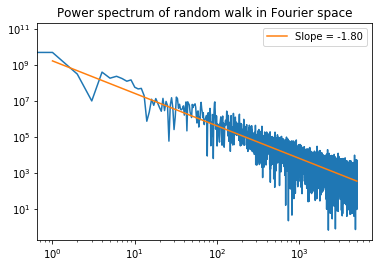

In [625]:
from scipy.optimize import curve_fit

def model(x, a, b):
    return a * x + b

N = 10000
x = np.arange(1, N+1)
rw = np.cumsum(np.random.randn(N))
window = 0.5 * (1 - np.cos(2 * np.arange(N) * np.pi / N))
rw *= window

rw_fft = np.abs(np.fft.rfft(rw))**2
plt.loglog(rw_fft[1:])

xfft = np.arange(1, len(rw_fft))
popt, pcov = curve_fit(model, np.log10(xfft), np.log10(rw_fft[1:]), p0=[-2, 10])
plt.loglog(xfft, 10**popt[1] * xfft**popt[0], label=f'Slope = {popt[0]:.2f}')
plt.legend()
plt.title('Power spectrum of random walk in Fourier space')
plt.savefig("RWPS.png")